In [39]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv('chessdb0-1',index_col=0)

In [41]:
df

,Opening,Colour,Num Games,ECO,Last Played,Perf Rating,Avg Player,Player Win %,Draw %,Opponent Win %,...,move2b,move3w,move3b,move4w,move4b,White_win%,Black_win%,White_odds,White_Wins,Black_Wins
0,"Alekhine Defense, Balogh Variation",white,692,B03,2018-06-22,2247,2225,40.8,24.3,35.0,...,Nd5,d4,d6,Bc4,NaN,40.8,35.0,1.165714,282.336,242.200
1,"Alekhine Defense, Brooklyn Variation",black,228,B02,2018-06-27,2145,2193,29.8,22.4,47.8,...,Ng8,NaN,NaN,NaN,NaN,47.8,29.8,1.604027,108.984,67.944
2,"Alekhine Defense, Exchange Variation",white,6485,B03,2018-07-06,2244,2194,40.8,27.7,31.5,...,Nd5,d4,d6,c4,Nb6,40.8,31.5,1.295238,2645.880,2042.775
3,"Alekhine Defense, Four Pawns Attack",white,881,B03,2018-06-20,2187,2130,39.7,23.2,37.1,...,Nd5,d4,d6,c4,Nb6,39.7,37.1,1.070081,349.757,326.851
4,"Alekhine Defense, Four Pawns Attack, Fianchett...",black,259,B03,2018-05-20,2122,2178,37.8,21.2,40.9,...,Nd5,d4,d6,c4,Nb6,40.9,37.8,1.082011,105.931,97.902
5,"Alekhine Defense, Four Pawns Attack, Main Line",white,1207,B03,2018-07-01,2243,2190,41.0,25.9,33.1,...,Nd5,d4,d6,c4,Nb6,41.0,33.1,1.238671,494.870,399.517
6,"Alekhine Defense, Four Pawns Attack, Trifunovi...",black,323,B03,2018-05-10,2231,2277,35.9,24.8,39.3,...,Nd5,d4,d6,c4,Nb6,39.3,35.9,1.094708,126.939,115.957
7,"Alekhine Defense, General",black,524,B02,2018-06-29,2032,2077,42.2,25.0,32.8,...,NaN,NaN,NaN,NaN,NaN,32.8,42.2,0.777251,171.872,221.128
8,"Alekhine Defense, Hunt Variation, Lasker Simul...",white,334,B02,2018-06-27,2205,2178,34.1,23.6,42.2,...,Nd5,c4,Nb6,c5,Nd5,34.1,42.2,0.808057,113.894,140.948
9,"Alekhine Defense, Maroczy Variation",white,931,B02,2018-07-09,2174,2174,36.6,25.7,37.7,...,NaN,NaN,NaN,NaN,NaN,36.6,37.7,0.970822,340.746,350.987


In [42]:
df.columns.values

array(['Opening', 'Colour', 'Num Games', 'ECO', 'Last Played',
       'Perf Rating', 'Avg Player', 'Player Win %', 'Draw %',
       'Opponent Win %', 'Moves', 'moves_list', 'move1w', 'move1b',
       'move2w', 'move2b', 'move3w', 'move3b', 'move4w', 'move4b',
       'White_win%', 'Black_win%', 'White_odds', 'White_Wins',
       'Black_Wins'], dtype=object)

## Highest/lowest average elo

In [43]:
he = df.sort_values('Avg Player',ascending=False).head()

## e4d5 line

In [44]:
e4d5= df[(df['move1w']=='e4') & (df['move1b']=='d5') ]
e4d5.shape

(22, 25)

In [45]:
e4d5 = df[(df['move1w']=='e4') & (df['move1b']=='d5') ].groupby('move2w')
e4d5

In [46]:
e4d5 = df[(df['move1w']=='e4') & (df['move1b']=='d5') ].groupby('move2w').agg({'Num Games': np.sum})

In [47]:
e4d5 = df[(df['move1w']=='e4') & (df['move1b']=='d5') ] \
.groupby('move2w') \
.agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
type(e4d5)

pandas.core.frame.DataFrame

In [48]:
e4d5

,Num Games,White_Wins,Black_Wins
move2w,,,
exd5,49541,20946.902,14616.747


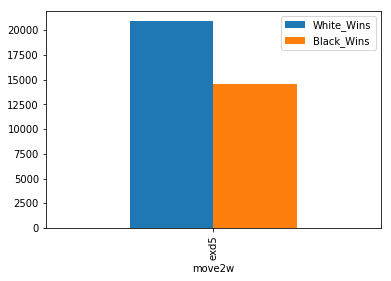

In [49]:
e4d5.plot(y= ['White_Wins', 'Black_Wins'],kind='bar')

## What are the strongest opening moves

In [50]:
w1 = df.groupby('move1w').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
w1['White_odds'] = w1['White_Wins'] / w1['Black_Wins']

In [51]:
print(w1.sort_values('White_odds', ascending = False))

        Num Games  White_Wins  Black_Wins  White_odds
move1w                                               
g3          18777    7543.344    5322.527    1.417249
d4        1308961  504869.953  370723.505    1.361850
c4         259049   97642.317   73896.748    1.321334
Nf3        142996   53965.848   41511.309    1.300028
e4        1691765  650892.967  536512.247    1.213193
b3          16134    6051.112    5527.250    1.094778
00E+04       7040    2745.600    2640.000    1.040000
Nc3          4480    1659.026    1646.710    1.007479
a3           1308     466.956     506.196    0.922481
b4           6215    2308.536    2503.668    0.922062
h3            183      66.978      75.945    0.881928
d3           1247     442.956     502.375    0.881724
f4          16315    5659.896    6554.233    0.863548
c3            799     258.077     329.987    0.782082
g4            797     279.083     371.083    0.752077
h4            121      41.019      56.991    0.719745
00E+03       1713     553.29

(1, 2)

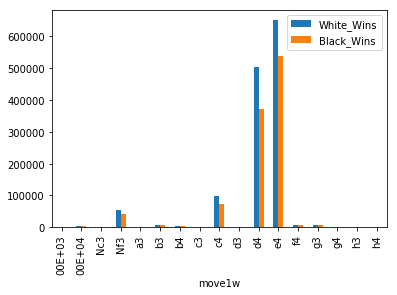

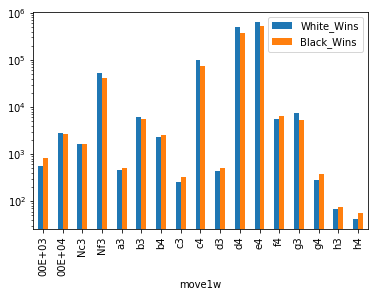

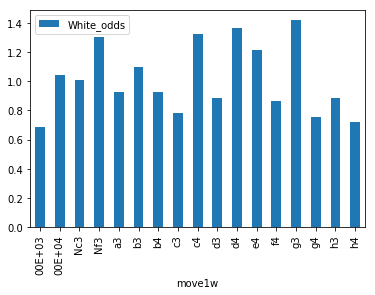

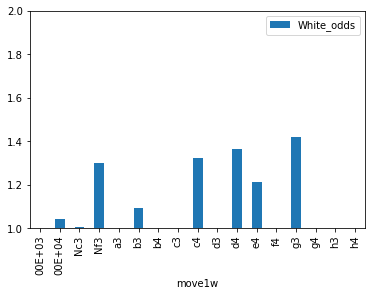

In [52]:
w1.plot(y= ['White_Wins', 'Black_Wins'],kind='bar')
w1.plot(y= ['White_Wins', 'Black_Wins'],kind='bar',logy=True)
w1.plot(y=['White_odds'], kind='bar')
w1.plot(y=['White_odds'], kind='bar').set_ylim(1,2)



## What is the strongest move for black after e4?

In [53]:
e4 = df[df['move1w']=='e4'].groupby('move1b').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})

In [54]:
e4['White_odds'] = e4['White_Wins'] / e4['Black_Wins']

In [55]:
e4.index.values

array(['Nc6', 'Nf6', 'a6', 'b6', 'c5', 'c6', 'd5', 'd6', 'e5', 'e6', 'g6'],
      dtype=object)

In [56]:
print(e4[['White_odds','Num Games']].sort_values('White_odds'))

        White_odds  Num Games
move1b                       
c5        1.080567     737822
g6        1.111637      56518
Nc6       1.206246       9318
Nf6       1.209108      34710
e6        1.303615     228091
c6        1.308556     129053
d6        1.337409      68605
e5        1.399075     370196
d5        1.399592      51575
a6        1.458711       1283
b6        1.474684       4594


In [57]:
e4 = df[df['move1w']=='e4'].agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
e4['White_odds'] = e4['White_Wins'] / e4['Black_Wins']
e4['white_win_%'] = e4['White_Wins'] / e4['Num Games']

In [58]:
e4['White_odds']

1.213193120268138

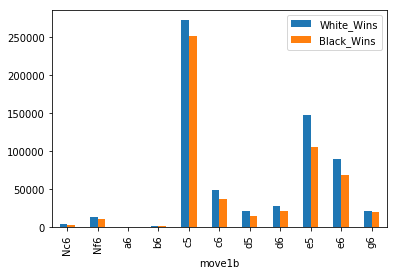

In [59]:
df[df['move1w']=='e4'].groupby('move1b').agg({'White_Wins' : np.sum, 'Black_Wins':np.sum}).plot(kind='bar')

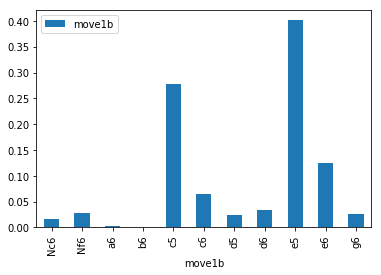

In [60]:
d = df[df['move1w']=='e4']
d =d.groupby('move1b').agg({'move1b': np.size})
d= d/d.sum()
d.plot(kind='bar')

In [61]:
d = df.groupby('move1w').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
d['move_p'] = d['Num Games'] / d['Num Games'].sum()
d.index.values, d['move_p'].values
move = np.random.choice(d.index.values,1,replace=False, p= d['move_p'].values)
move[0]

'Nf3'

## Countering d4

In [70]:
d4 = df[df['move1w']=='d4'].groupby('move1b').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})

In [71]:
d4['White_odds'] = d4['White_Wins'] / d4['Black_Wins']

In [74]:
print(d4[['White_odds','Num Games']].sort_values('White_odds'))

        White_odds  Num Games
move1b                       
d6        0.992931      18321
g6        1.081049      23398
e6        1.199456      16035
Nc6       1.236885       1696
Nf6       1.279563     729601
c5        1.319884      18136
f5        1.422004      53855
b5        1.509677       1067
e5        1.512433        563
b6        1.532895       1597
d5        1.559140     443203
c6        1.729167        257


In [62]:
def generate_high_elo_moves(d):
    move = np.random.choice(d.index.values,1,replace=False, p= d['move_p'].values)
    return move[0]

In [63]:
def generate_high_elo_weighted_moves(move_list):
    if len(move_list) == 0:
        d = generate_high_elo_groups(move_list)
        d.index.values, d['move_p'].values
        return generate_high_elo_moves(d)
    if len(move_list) == 1:
        d = generate_high_elo_groups(move_list)
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return generate_high_elo_moves(d)
    if len(move_list) == 2:
        d = generate_high_elo_groups(move_list)
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return generate_high_elo_moves(d)
    if len(move_list) == 3:
        d = generate_high_elo_groups(move_list)
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return generate_high_elo_moves(d)
    if len(move_list) == 4:
        d = generate_high_elo_groups(move_list)
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return generate_high_elo_moves(d)
    if len(move_list) == 5:
        d = generate_high_elo_groups(move_list)
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return generate_high_elo_moves(d)
    if len(move_list) == 6:
        d = generate_high_elo_groups(move_list)
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return generate_high_elo_moves(d)
    if len(move_list) == 7:
        d = generate_high_elo_groups(move_list)
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return generate_high_elo_moves(d)

In [64]:
def generate_high_elo_groups(move_list):
    if len(move_list) == 0:
        d = df.groupby('move1w').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        d.index.values, d['move_p'].values
        return d
    if len(move_list) == 1:
        d = df[ (df['move1w']== move_list[0]) ].groupby('move1b').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return d
    if len(move_list) == 2:
        d = df[ (df['move1w']== move_list[0]) & (df['move1b']== move_list[1])].groupby(
            'move2w').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return d
    if len(move_list) == 3:
        d = df[ (df['move1w']== move_list[0]) & (df['move1b']== move_list[1]) & 
               (df['move2w']== move_list[2])].groupby(
            'move2b').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return d
    if len(move_list) == 4:
        d = df[ (df['move1w']== move_list[0]) & (df['move1b']== move_list[1]) & 
               (df['move2w']== move_list[2]) & (df['move2b']== move_list[1])].groupby(
            'move3w').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return d
    if len(move_list) == 5:
        d = df[ (df['move1w']== move_list[0]) & (df['move1b']== move_list[1]) & 
               (df['move2w']== move_list[2]) & (df['move2b']== move_list[3]) &
               (df['move3w']== move_list[4]) ].groupby(
            'move3b').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return d
    if len(move_list) == 6:
        d = df[ (df['move1w']== move_list[0]) & (df['move1b']== move_list[1]) & 
               (df['move2w']== move_list[2]) & (df['move2b']== move_list[3]) &
               (df['move3w']== move_list[4]) & (df['move3b']== move_list[5])].groupby(
            'move4w').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return d
    if len(move_list) == 7:
        d = df[ (df['move1w']== move_list[0]) & (df['move1b']== move_list[1]) & 
               (df['move2w']== move_list[2]) & (df['move2b']== move_list[3]) &
               (df['move3w']== move_list[4]) & (df['move3b']== move_list[5]) &
               (df['move4w']== move_list[6])].groupby(
            'move4w').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
        d['move_p'] = d['Num Games'] / d['Num Games'].sum()
        return d

In [65]:
def generate_high_elo_move_commentary(move_list):
    d = generate_high_elo_groups(move_list[:-1])
    d['white_odds'] = d['White_Wins'] / d['Black_Wins']
    
    #player_move = d['white_odds'][move_list[(len(move_list)-1)]]
    if len(move_list) % 2 == 1:
        strongest_move = d['white_odds'].argmax()
        print("The strongest move for white was "+ strongest_move + " with a win/loss ratio of " + str( round( d['white_odds'][strongest_move], 2) ) + ":1.")
        
    if len(move_list) % 2 == 0:
        strongest_move = d['white_odds'].idxmin()
        print("The strongest move for black was "+ strongest_move + " with a win/loss ratio of " + str( round( d['white_odds'][strongest_move], 2) ) + ":1.")
        

In [66]:
generate_high_elo_move_commentary(['e4','e5'])

The strongest move for black was c5 with a win/loss ratio of 1.08:1.


In [67]:
generate_high_elo_weighted_moves(['e4','e5','Nf3'])

'Nc6'

In [68]:
move_list=['e4']
d = df[ (df['move1w']== move_list[0]) ].groupby('move1b').agg({'Num Games': np.sum, 'White_Wins' : np.sum, 'Black_Wins':np.sum})
d['move_p'] = d['Num Games'] / d['Num Games'].sum()
generate_high_elo_moves(d)

'e6'

In [69]:
d

,Num Games,White_Wins,Black_Wins,move_p
move1b,,,,
Nc6,9318,3910.606,3241.965,0.005508
Nf6,34710,13577.389,11229.260,0.020517
a6,1283,613.935,420.875,0.000758
b6,4594,2140.804,1451.704,0.002716
c5,737822,271864.285,251594.138,0.436126
c6,129053,49686.826,37970.724,0.076283
d5,51575,21701.516,15505.605,0.030486
d6,68605,28091.144,21004.152,0.040552
e5,370196,147469.924,105405.333,0.218822
